In [ ]:
# get the dataset from kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paulbacher/dataset-rsna-bcd-1456x728-final-tfrecords

100% 19.1G/19.1G [11:21<00:00, 24.6MB/s]
100% 19.1G/19.1G [11:21<00:00, 30.1MB/s]


In [ ]:
!unzip /content/drive/MyDrive/Dataset/dataset-rsna-bcd-1456x728-final-tfrecords.zip 

Archive:  /content/drive/MyDrive/Dataset/dataset-rsna-bcd-1456x728-final-tfrecords.zip
  inflating: batch_0.tfrecords       
  inflating: batch_1.tfrecords       
  inflating: batch_10.tfrecords      
  inflating: batch_11.tfrecords      
  inflating: batch_12.tfrecords      
  inflating: batch_13.tfrecords      
  inflating: batch_14.tfrecords      
  inflating: batch_15.tfrecords      
  inflating: batch_16.tfrecords      
  inflating: batch_17.tfrecords      
  inflating: batch_18.tfrecords      
  inflating: batch_19.tfrecords      
  inflating: batch_2.tfrecords       
  inflating: batch_20.tfrecords      
  inflating: batch_21.tfrecords      
  inflating: batch_22.tfrecords      
  inflating: batch_23.tfrecords      
  inflating: batch_24.tfrecords      
  inflating: batch_25.tfrecords      
  inflating: batch_26.tfrecords      
  inflating: batch_27.tfrecords      
  inflating: batch_28.tfrecords      
  inflating: batch_29.tfrecords      
  inflating: batch_3.tfrecords       
 

In [ ]:
#import the important Lib

In [ ]:
# Install the attention models package
#!pip install -qq /kaggle/input/keras-cv-attention-models/keras_cv_attention_models-1.3.5-py3-none-any.whl 
!pip install keras_cv_attention_models
# Standard libraries
import os
import sys
import time

# Data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Deep learning libraries
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Support libraries
import pickle
import math
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop, RandomCrop, Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomTranslation, RandomContrast

from keras_cv_attention_models import convnext
from multiprocessing import cpu_count
from tqdm.notebook import tqdm

# Image processing libraries
import cv2

# Miscellaneous libraries
import gc
import datetime

# IPython display library
from IPython.display import clear_output
clear_output()

print(f'Tensorflow Version: {tf.version}')
print(f'Python Version: {sys.version}')

Tensorflow Version: <module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.9/dist-packages/tensorflow/_api/v2/version/__init__.py'>
Python Version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]


In [ ]:
# Image dimensions
IMG_HEIGHT = 1456
IMG_WIDTH = 728
N_CHANNELS = 1
INPUT_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 1)
N_SAMPLES_TFRECORDS = 548
EPOCHS = 100
# Batch size
BATCH_SIZE = 32

This code snippet uses TensorFlow and Scikit-learn libraries to load data in the form of TFRecord files, which are a format for storing large amounts of binary data. Here's what each line of the code does:

import tensorflow as tf: imports the TensorFlow library, which is a popular machine learning framework developed by Google.
from sklearn.model_selection import train_test_split: imports the train_test_split function from the Scikit-learn library, which is a machine learning library for Python that provides tools for data preprocessing, modeling, and evaluation.
tfrecords_path = '/content': defines the path to the directory where the TFRecord files are stored.
tfrecords = sorted(tf.io.gfile.glob(f'{tfrecords_path}/batch_*.tfrecords')): uses the gfile function from TensorFlow's IO module to get a list of all TFRecord files with the prefix "batch_" in the directory specified by tfrecords_path. The list of files is then sorted in alphabetical order using the sorted function. The len function is used to print the number of TFRecords found.
print(f'Found {len(tfrecords)} TFRecords'): prints the number of TFRecord files found.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define the path to your TFRecord files
tfrecords_path = '/content'

# Use gfile to get all TFRecord files with the prefix "batch_"
tfrecords = sorted(tf.io.gfile.glob(f'{tfrecords_path}/batch_*.tfrecords'))
print(f'Found {len(tfrecords)} TFRecords')

Found 100 TFRecords


This code defines a function called create_dataset that creates a TensorFlow Dataset object from a list of TFRecord file paths. Here's what each line of the code does:

def create_dataset(tfrecords, batch_size=BATCH_SIZE, valid=False):: defines the create_dataset function, which takes a list of TFRecord file paths as input, as well as optional arguments for batch size (batch_size) and whether the dataset is for validation (valid).

dataset = tf.data.TFRecordDataset(tfrecords, compression_type='GZIP'): creates a TensorFlow TFRecordDataset object from the list of file paths tfrecords. The compression_type argument specifies that the files are compressed with gzip.

dataset = dataset.map(decoder): applies a decoding function called decoder to each record in the dataset. The decoder function is responsible for parsing and decoding the record bytes into a format that can be used by the model.

return dataset: returns the resulting dataset object.

The code doesn't actually batch the records or perform any further preprocessing, so additional code will be needed to use this dataset object for training or validation.

In [ ]:
def create_dataset(tfrecords, batch_size=BATCH_SIZE,
                   valid=False):
  
  '''
  This line creates a tf.data.TFRecordDataset object that reads the TFRecord files 
  from the list of file paths tfrecords. 
  The compression_type argument specifies that the files are compressed with gzip.
  '''
  # Create dataset path/label
  dataset = tf.data.TFRecordDataset(tfrecords,
                                      compression_type='GZIP')

  # Decode mapping
  '''
  This line applies the decoder function to each record in the dataset. 
  The decoder function is responsible for 
  parsing and decoding the record bytes into a format that can be used by the model.
  '''
  dataset = dataset.map(decoder)

  '''
  This line batches the records in the dataset into groups of BATCH_SIZE records. 
  This is done to improve training performance by processing multiple records at once.
  '''
 
  return dataset

'''
This is a function that decodes a single record from its byte string representation.
 It takes as input a byte string record_bytes.
'''


Overall, this code defines a function create_dataset that takes a list of 
TFRecord file paths, applies a decoder function to parse and decode the records, 
batches the records into groups, and returns the resulting dataset object.
The decoder function itself extracts the image and label features from a single record
and returns them as a tuple. This code is designed to work with TFRecord files that 
contain images and their corresponding labels.
'''

In [ ]:
def decoder(record_bytes):
  '''
  This line uses tf.io.parse_single_example to parse a single record from 
  its byte string representation into a dictionary of features. The dictionary 
  contains the keys image, target, and patient_id. The tf.io.FixedLenFeature 
  function is used to specify the expected shape and data type of each feature.
  '''
  features = tf.io.parse_single_example(record_bytes, {
  'image': tf.io.FixedLenFeature([], tf.string),
  'target': tf.io.FixedLenFeature([], tf.int64),
  'patient_id': tf.io.FixedLenFeature([], tf.int64)})


  '''
  These lines decode the image feature from the record bytes using tf.io.decode_png
   and reshape it into a 3D tensor of shape [IMG_HEIGHT, IMG_WIDTH, N_CHANNELS].
   N_CHANNELS is a constant that specifies the number of color channels in the image.
  '''
  img = tf.io.decode_png(features['image'], channels=N_CHANNELS)
  img = tf.reshape(img, [IMG_HEIGHT, IMG_WIDTH, N_CHANNELS])



  
  '''
  These lines extract the target feature from the 
  record and return it along with the decoded image tensor as a tuple.
  '''
  label = features['target']
  return img, label

his code defines a function called create_balanced_subdataset that creates a balanced subset of a TFRecord dataset by selecting a specified number of samples from each class. Here's what each line of the code does:

def create_balanced_subdataset(tfrecords, n_samples):: defines the create_balanced_subdataset function, which takes a list of TFRecord file paths as input (tfrecords) and the number of samples to select from each class (n_samples).

dataset = create_dataset(tfrecords): creates a TFRecord dataset using the create_dataset function defined previously.

The for loop iterates over each record in the dataset and does the following:

label_mean = tf.reduce_mean(label): calculates the mean of the label tensor, which is a binary value indicating whether the image represents cancer or not.
label_mean=int(label_mean): converts the mean to an integer.
If the mean is 1 (i.e., the label is cancer) and the number of cancer samples selected so far is less than 1000, the current image is added to the cancer_subset list, and the cancer sample count is incremented.
If the mean is 0 (i.e., the label is not cancer) and the number of non-cancer samples selected so far is less than 1000, the current image is added to the non_cancer_subset list, and the non-cancer sample count is incremented.
If the desired number of samples from each class has been reached (i.e., 1000 for each class in this case), the loop is exited.
random.shuffle(cancer_subset): shuffles the cancer samples randomly.

random.shuffle(non_cancer_subset): shuffles the non-cancer samples randomly.

n_cancer = min(len(cancer_subset), n_samples // 2): calculates the number of cancer samples to select by taking the minimum of the number of cancer samples available and half of the desired number of total samples.

n_non_cancer = min(len(non_cancer_subset), n_samples // 2): calculates the number of non-cancer samples to select by taking the minimum of the number of non-cancer samples available and half of the desired number of total samples.

cancer_subset = cancer_subset[:n_cancer]: selects the first n_cancer cancer samples from the shuffled cancer_subset list.

non_cancer_subset = non_cancer_subset[:n_non_cancer]: selects the first n_non_cancer non-cancer samples from the shuffled non_cancer_subset list.

balanced_subset = tf.data.Dataset.from_tensor_slices((cancer_subset + non_cancer_subset, [1] * n_cancer + [0] * n_non_cancer)): creates a new dataset by concatenating the selected cancer and non-cancer samples and their corresponding labels (1 for cancer, 0 for non-cancer).

balanced_subset = balanced_subset.shuffle(buffer_size=len(cancer_subset) + len(non_cancer_subset), reshuffle_each_iteration=True): shuffles the new dataset.

balanced_subset = balanced_subset.batch(BATCH_SIZE): batches the new dataset.

return balanced_subset: returns the resulting balanced subset of the original dataset.

In [ ]:
def create_balanced_subdataset(tfrecords, n_samples):
    # Create the main dataset
    dataset = create_dataset(tfrecords)
    count_cancer=0
    count_non_cancer=0
    cancer_subset = []
    non_cancer_subset = []
    for image, label in dataset:
        label_mean = tf.reduce_mean(label)
        label_mean=int(label_mean)
        #print(label)
        if label_mean == 1 and count_cancer < 1000:
            cancer_subset.append(image)
            count_cancer=count_cancer+1
          #  print('count_cancer')
        elif label_mean == 0 and count_non_cancer < 1000:
            non_cancer_subset.append(image)
            count_non_cancer=count_non_cancer+1
           # print('count_non_cancer')
        elif count_cancer>=1000 and count_non_cancer>=1000:
            break
    
    print(count_cancer)
    print(count_non_cancer)
    # Shuffle the subsets to randomly select samples
    random.shuffle(cancer_subset)
    random.shuffle(non_cancer_subset)
    
    # Get the desired number of samples from each subset
    n_cancer = min(len(cancer_subset), n_samples // 2)
    n_non_cancer = min(len(non_cancer_subset), n_samples // 2)
    cancer_subset = cancer_subset[:n_cancer]
    non_cancer_subset = non_cancer_subset[:n_non_cancer]
    
    # Combine the subsets and create a new dataset
    balanced_subset = tf.data.Dataset.from_tensor_slices((cancer_subset + non_cancer_subset,
                                                           [1] * n_cancer + [0] * n_non_cancer))
    
    # Shuffle the new dataset
    balanced_subset = balanced_subset.shuffle(buffer_size=len(cancer_subset) + len(non_cancer_subset),
                                               reshuffle_each_iteration=True)
    
    # Batch the dataset
    balanced_subset = balanced_subset.batch(BATCH_SIZE)
    
    return balanced_subset

In [ ]:
dataset=create_balanced_subdataset(tfrecords,2000)

1000
1000


This code snippet is splitting a given dataset into training, validation, and test sets, with a total size of n_samples. It first shuffles the dataset, then calculates the sizes of the training, validation, and test sets based on the specified proportions.

Next, it uses the take and skip methods to split the shuffled dataset into the appropriate subsets, with take selecting the first N elements of the dataset, and skip discarding the first N elements and returning the rest.

Afterwards, it concatenates the datasets to ensure that all samples are included, then unbatch the datasets to individual samples to prepare for batching into minibatches. Finally, it batches the datasets into minibatches of size BATCH_SIZE.

The resulting datasets are:

1.   train_data: the training set
2.   val_data: the validation set
3.   test_data: the test set
4.   all_data: the entire dataset, batched for processing.










In [ ]:
n_samples=32

balanced_dataset = dataset.shuffle(buffer_size=n_samples)

# Calculate the sizes of the training, validation, and test sets
train_size = int(n_samples * 0.6)
val_size = int(n_samples * 0.38)
test_size = n_samples - train_size - val_size

# Split the dataset into training, validation, and test sets
train_dataset = balanced_dataset.take(train_size)
val_dataset = balanced_dataset.skip(train_size).take(val_size)
test_dataset = balanced_dataset.skip(train_size + val_size)

# Concatenate the datasets to ensure that all samples are included
all_data = train_dataset.concatenate(val_dataset).concatenate(test_dataset)

# Unbatch the datasets into individual samples
train_data = train_dataset.unbatch()
val_data = val_dataset.unbatch()
test_data = test_dataset.unbatch()
all_data = all_data.unbatch()

# Batch the datasets
train_data = train_data.batch(BATCH_SIZE)
val_data = val_data.batch(BATCH_SIZE)
test_data = test_data.batch(BATCH_SIZE)
all_data = all_data.batch(BATCH_SIZE)

This function check_dataset takes a dataset as input and prints out some information about the dataset.

Specifically, it extracts the first batch of data from the dataset using next(iter(dataset)). It then prints out the shape and data type of the image and label tensors in the batch, as well as the minimum and maximum pixel values of the image tensor.

This function can be used to check that the input data is properly formatted and to get a sense of the range of values in the data.

In [ ]:
def check_dataset(dataset):
    image, label = next(iter(dataset))
    image = image.numpy()
    clear_output()
    print(f"X_batch shape: {image.shape}, y_batch shape: {label.shape}")
    print(f"X_batch dtype: {image.dtype}, y_batch dtype: {label.dtype}")
    print(f"X_batch min: {image.min():.2f}, max: {image.max():.2f}")

check_dataset(train_data)

X_batch shape: (32, 1456, 728, 1), y_batch shape: (32,)
X_batch dtype: uint8, y_batch dtype: <dtype: 'int32'>
X_batch min: 0.00, max: 255.00


This function display_batch(dataset) displays a batch of images from the input dataset with their corresponding labels.

It first extracts the first batch of images and labels from the dataset using next(iter(dataset)). Then, it creates a figure with a grid of subplots where each subplot corresponds to an image in the batch. It sets the title of each subplot to the corresponding label and displays the image using the 'jet' colormap. Finally, it displays the entire figure using plt.show().

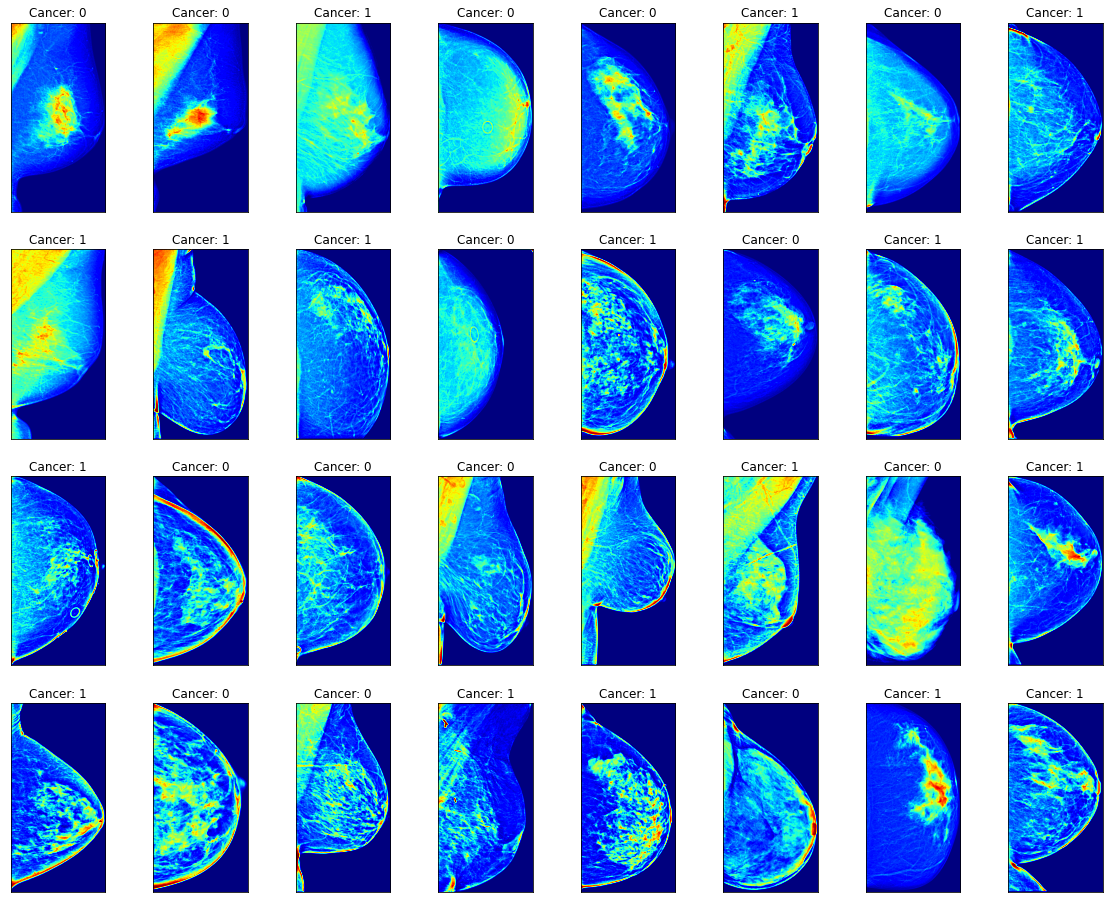

In [ ]:
def display_batch(dataset):
    images, labels = next(iter(dataset))
    clear_output()
    plt.figure(figsize=(20, BATCH_SIZE / 2))
    for i in range(BATCH_SIZE):
        plt.subplot(int(BATCH_SIZE / 8), 8, i + 1)
        plt.title(f"Cancer: {int(labels[i])}", fontsize=12)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i], cmap='jet')
    plt.show()

display_batch(train_data)

This function will display a batch of images and their corresponding labels from the validation dataset. The images are displayed in a grid, with each row containing 8 images. The label for each image is displayed below it, indicating whether it is a cancerous image or not. The images are shown using a 'jet' colormap.

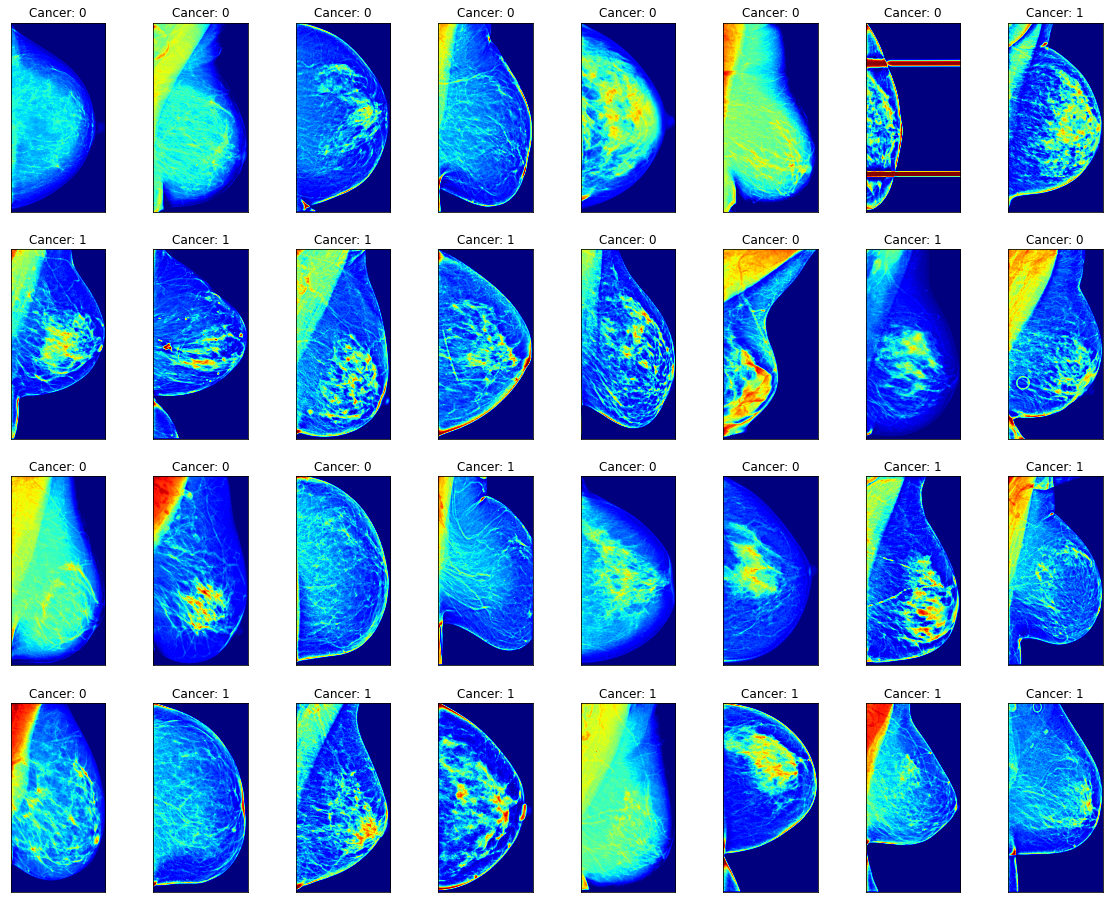

In [ ]:
display_batch(val_data)

This function will display a batch of images and their corresponding labels from the test dataset. The images are displayed in a grid, with each row containing 8 images. The label for each image is displayed below it, indicating whether it is a cancerous image or not. The images are shown using a 'jet' colormap.

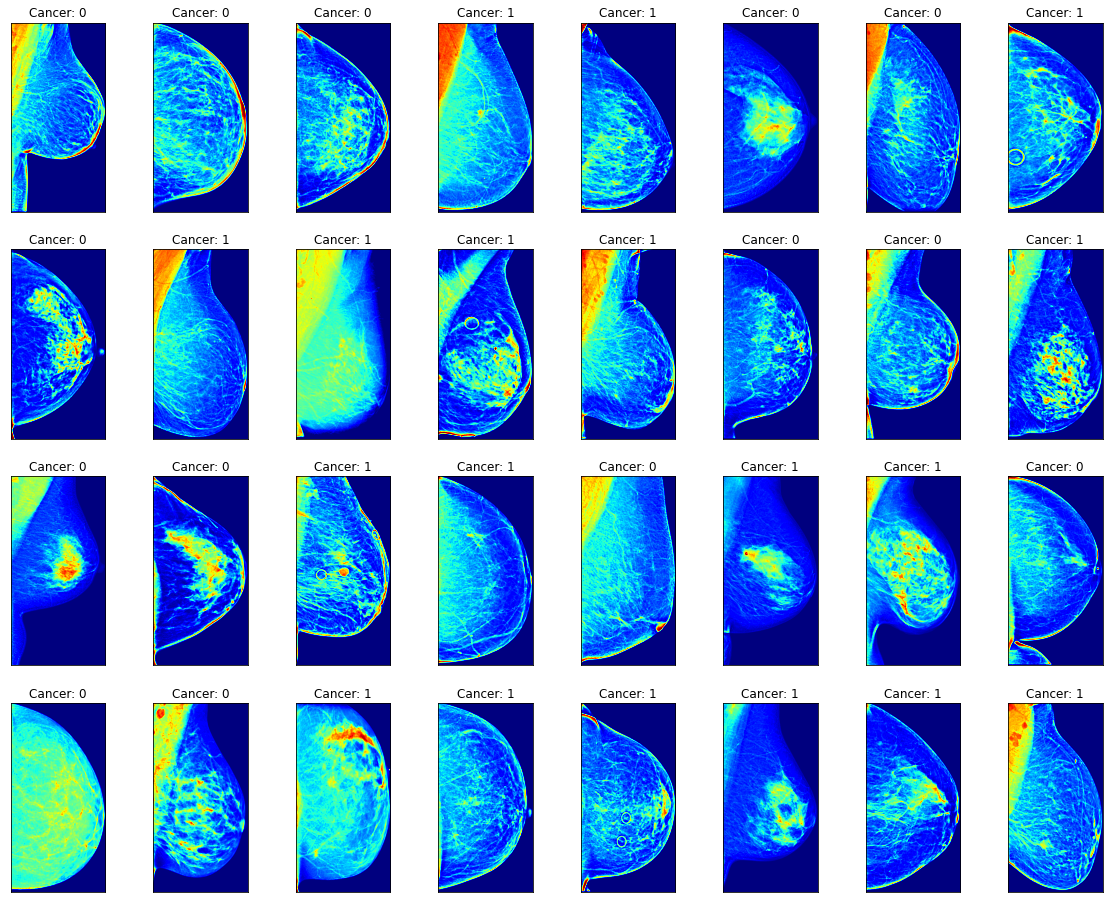

In [ ]:
display_batch(test_data)

his code defines a function normalizer() that takes an image tensor as input and returns the preprocessed image tensor. The function is used to normalize the image data before feeding it to the model.

The function first uses tf.repeat() function to repeat the single channel of the image tensor to create a 3-channel image tensor. This is done because most pre-trained models expect images with three color channels.

The function then converts the image tensor to float32 data type using tf.cast(). This is done because most deep learning models expect the input data to be in the float32 format.

Finally, the function uses the tf.keras.applications.imagenet_utils.preprocess_input() function to preprocess the image tensor. This function applies the necessary preprocessing steps required by the pre-trained models trained on the ImageNet dataset. The mode parameter is set to 'torch' to specify that the preprocessing mode should be the same as the one used by the PyTorch deep learning framework.

Once the preprocessing is completed, the function returns the preprocessed image tensor.

In [ ]:
def normalizer(img):
    img = tf.repeat(img, repeats=3, axis=3)
    img = tf.cast(img, tf.float32)
    img = tf.keras.applications.imagenet_utils.preprocess_input(img, mode='torch')
    return img

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D, Conv2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras import regularizers

There seems to be a small mistake in the code you provided. The second line should read val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE) instead of val_dataset = val_data.prefetch(buffer_size=tf.data.AUTOTUNE).

The prefetch() method can be used to overlap the preprocessing of the next batch of data with the training of the current batch. This can help to reduce the idle time of the GPU or TPU, which can lead to improved training performance. The AUTOTUNE parameter sets the buffer size dynamically based on available system resources.

In [ ]:
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_data.prefetch(buffer_size=tf.data.AUTOTUNE)

Sure, here is an explanation of the model architecture:

Input layer: The model takes an input tensor of shape (1456, 728, 1) which represents the size of the input image. This is defined using the Input function from Keras.

Data augmentation: The model applies data augmentation techniques to the input images to improve its generalization capabilities. This is done using the Sequential function from Keras and the RandomFlip, RandomZoom, and RandomContrast functions to perform horizontal flipping, random zooming, and random contrast adjustments.

Normalization layer: The model adds a normalization layer after the input layer to normalize the pixel values of the input image. This helps to improve the stability and convergence of the model during training.

EfficientNetB7 base model: The model loads a pre-trained EfficientNetB7 model without the top layer using the EfficientNetB7 function from Keras. The first 800 layers of the base model are frozen to prevent overfitting on the small dataset.

Convolutional layers: The model adds several convolutional layers to the top of the base model to extract more abstract features from the input image. The Conv2D function from Keras is used to define the convolutional layers. Batch normalization is added after each convolutional layer to speed up training and improve model performance.

Flatten layer: The model flattens the output of the convolutional layers into a 1-dimensional array using the Flatten function from Keras.

Fully connected layers: The model adds several fully connected layers to the flattened output of the convolutional layers to perform the final classification task. The Dense function from Keras is used to define the fully connected layers, and the activation function used is the Rectified Linear Unit (ReLU) activation function.

Output layer: The model adds a single output layer with a sigmoid activation function to produce a binary classification output (cancer or non-cancer).

Compilation: The model is compiled using the Adam optimizer with momentum and binary cross-entropy loss function. The learning rate of the optimizer is set to 0.00001, and accuracy is used as a metric to evaluate the performance of the model.

In [ ]:
# Mixed Policy Settings
# Define the input shape of the images
input_shape = (1456, 728, 1)

# Define the inputs layer
inputs = Input(shape=input_shape)

#define aigmentation layer
data_augmentation = tf.keras.Sequential([
    RandomFlip(mode='horizontal'),
    RandomZoom(height_factor=0.2, width_factor=0.2),
    RandomContrast(factor=0.2)
])
x=data_augmentation(inputs)

# Add a normalization layer after the input layer
x = normalizer(x)

# Load pre-trained EfficientNetB7 model without top layer
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_tensor=x)
# Freeze the first 800 layers
for layer in base_model.layers[:800]:
    layer.trainable = False
# Add Conv2D layers to the top of the model
x = base_model.output
x = tf.keras.layers.BatchNormalization()(x)

x = Conv2D(filters=256, kernel_size=(3,3), activation='relu')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = Flatten()(x)

x = Dense(10000, activation='relu')(x)

x = Dense(1000, activation='relu')(x)

x = Dense(100, activation='relu')(x)

x = Dense(10, activation='relu')(x)
x = Dense(5, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)



model = tf.keras.Model(inputs=inputs, outputs=predictions)


# Define the Adam optimizer with momentum
adam_with_momentum = Adam(learning_rate=0.00001, beta_1=0.8)

# Compile the model
model.compile(optimizer=adam_with_momentum, loss='binary_crossentropy', metrics=['accuracy'])





the plot_model() function from the tf.keras.utils module is used to visualize the structure of the model graphically, including the input and output shapes, the connections between layers, and the layer names. You can use this function to generate a visualization of your model by passing in the model object as the first argument and setting the various display options as desired. The resulting image can be saved to a file or displayed in a Jupyter notebook.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.278075 to fit



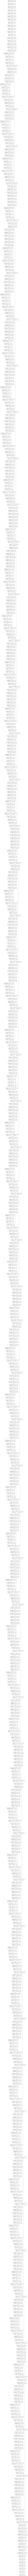

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True,
                          show_layer_names=True, expand_nested=False)

* **Train the Model**


This code fits the defined model to the training and validation datasets using the fit method. The fit method is used to train the model for a fixed number of epochs on a given dataset.

The train_dataset and val_dataset are passed as the training and validation datasets, respectively. The epochs argument specifies the number of times the model should be trained on the entire training dataset. In this case, the model is trained for 100 epochs.

The steps_per_epoch argument is set to None, which means that the number of steps per epoch is calculated automatically by dividing the number of samples by the batch size.

The fit method returns a history object that contains information about the training process such as the loss and accuracy values at each epoch.

In [ ]:
# Fit the model using the generator
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=val_dataset,
    steps_per_epoch=None,
)



19/19 [==============================] - 83s 3s/step - loss: 0.6989 - accuracy: 0.5181 - val_loss: 0.6980 - val_accuracy: 0.4583
Epoch 2/100
19/19 [==============================] - 47s 3s/step - loss: 0.6910 - accuracy: 0.5033 - val_loss: 0.6970 - val_accuracy: 0.5052
Epoch 3/100
19/19 [==============================] - 43s 2s/step - loss: 0.6885 - accuracy: 0.5345 - val_loss: 0.6845 - val_accuracy: 0.6068
Epoch 4/100
19/19 [==============================] - 44s 2s/step - loss: 0.6855 - accuracy: 0.5609 - val_loss: 0.6866 - val_accuracy: 0.5599
Epoch 5/100
19/19 [==============================] - 43s 2s/step - loss: 0.6471 - accuracy: 0.6447 - val_loss: 0.6815 - val_accuracy: 0.5703
Epoch 6/100
19/19 [==============================] - 45s 2s/step - loss: 0.6697 - accuracy: 0.5888 - val_loss: 0.6805 - val_accuracy: 0.5833
Epoch 7/100
19/19 [==============================] - 44s 2s/step - loss: 0.6491 - accuracy: 0.6020 - val_loss: 0.6551 - val_accuracy: 0.6172
Epoch 8/100
19/19 [======

**Evalute the Model**

This code is used to visualize the training history of the model. Two plots are generated: one for the loss and one for the accuracy.

The first plot shows the trend of the loss function over the epochs on both the training and validation sets. The x-axis represents the number of epochs, while the y-axis represents the value of the loss function. The blue line represents the loss on the training set, and the orange line represents the loss on the validation set. The legend shows which line corresponds to which set. The plot can be used to evaluate the performance of the model during training and to detect overfitting or underfitting. If the loss on the validation set starts to increase while the loss on the training set keeps decreasing, it may be an indication of overfitting.

The second plot shows the trend of the accuracy over the epochs on both the training and validation sets. The x-axis represents the number of epochs, while the y-axis represents the value of the accuracy. The blue line represents the accuracy on the training set, and the orange line represents the accuracy on the validation set. The legend shows which line corresponds to which set. The plot can be used to evaluate the performance of the model during training and to detect overfitting or underfitting. If the accuracy on the validation set starts to decrease while the accuracy on the training set keeps increasing, it may be an indication of overfitting.







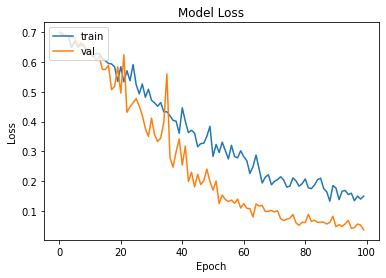

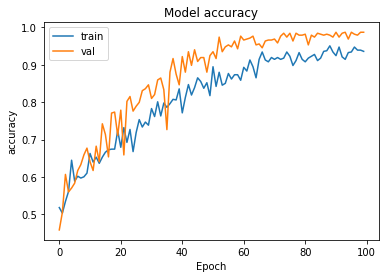

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

This code evaluates the trained model on the test dataset and prints the loss and accuracy of the model on the test set.

The evaluate() method takes in the test dataset as input and returns the loss and accuracy values of the model on the test dataset. These values are then printed using print(). The .4f format specifier is used to print the floating point values with 4 decimal places.

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

32/32 [==============================] - 49s 2s/step - loss: 0.0393 - accuracy: 0.9891
Test loss: 0.0393
Test accuracy: 0.9891


This code calculates the confusion matrix for the predictions made by the model on the test dataset.

It first initializes empty arrays to store the true labels and predicted labels. Then, it iterates through the test dataset, makes predictions for each batch using the model.predict() method, and appends the true and predicted labels to the respective arrays.

Once all predictions have been made, the arrays are converted to NumPy arrays, and the confusion_matrix() function from scikit-learn is used to calculate the confusion matrix. The confusion matrix is a matrix that summarizes the performance of a classification model by showing the number of true positives, false positives, true negatives, and false negatives.

Overall, this code allows us to evaluate how well the model is performing on the test dataset and understand the types of errors it is making.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Initialize empty arrays to store true and predicted labels
true_labels = []
pred_labels = []

# Iterate through the test dataset and make predictions for each batch
for batch_images, batch_labels in test_dataset:
    batch_pred = model.predict(batch_images)

    # Append true and predicted labels to the arrays
    true_labels.extend(batch_labels.numpy().ravel())
    pred_labels.extend((batch_pred > 0.5).astype(int).ravel())

# Convert the arrays to numpy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# Print the confusion matrix
print(confusion_matrix(true_labels, pred_labels))



1/1 [==============================] - 1s 1s/step
[[496   7]
 [  8 497]]


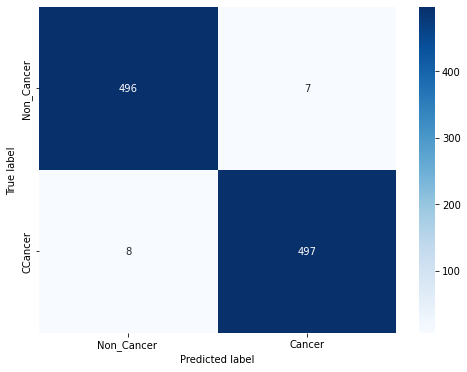

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Non_Cancer ', 'Cancer'], 
            yticklabels=['Non_Cancer', 'CCancer'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
def accuracy(confusion_matrix):
    tp = confusion_matrix[1, 1]
    tn = confusion_matrix[0, 0]
    fp = confusion_matrix[0, 1]
    fn = confusion_matrix[1, 0]
    
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    return acc
print(accuracy(confusion_matrix(true_labels, pred_labels)))

0.9851190476190477


This code calculates the precision, recall, and F1 score for the predictions made by the model on the test dataset. These are commonly used metrics in binary classification problems, which this model is performing (predicting whether an image shows a damaged vehicle or not).

The precision_score function calculates the precision, which is the ratio of true positives to the total number of positive predictions made by the model. It gives an indication of how many of the model's positive predictions are actually correct.

The recall_score function calculates the recall, which is the ratio of true positives to the total number of actual positive samples in the dataset. It gives an indication of how many of the positive samples the model is able to correctly identify.

The f1_score function calculates the F1 score, which is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall.

The output of this code is the precision, recall, and F1 score printed to the console.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))




Precision: 0.986
Recall: 0.984
F1 score: 0.985


This code calculates the false positive rate, true positive rate, and AUC (area under the curve) for the ROC (receiver operating characteristic) curve, and then plots the ROC curve.

The false positive rate (FPR) is the proportion of actual negative samples that are incorrectly classified as positive. The true positive rate (TPR) is the proportion of actual positive samples that are correctly classified as positive. The ROC curve plots the TPR against the FPR for different classification thresholds, and the AUC is a metric that measures the overall performance of the classifier across all possible thresholds.

The roc_curve function from sklearn.metrics is used to calculate the FPR, TPR, and thresholds for the ROC curve, given the true labels and predicted labels. The auc function from the same module is used to calculate the AUC given the FPR and TPR.

Finally, the matplotlib library is used to plot the ROC curve, with the FPR on the x-axis and the TPR on the y-axis. The plot function is used to plot the curve, with the AUC displayed in the legend. The xlim and ylim functions are used to set the axis limits, and the xlabel, ylabel, and title functions are used to add labels to the plot.

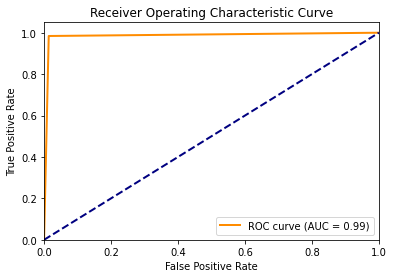

In [ ]:
# Calculate false positive rate, true positive rate, and AUC for ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, pred_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

This code measures the inference time for making predictions on a batch of images using the trained model.

The time module is imported to record the start and end time of the prediction process. start_time is set to the current time before the prediction process starts, and end_time is set to the current time after the prediction process ends. The difference between end_time and start_time gives the total time taken for inference.

The prediction is done using the model.predict() method on the batch_images input. The predicted values are stored in the batch_pred variable.

The inference time for this batch is printed to the console using print(). The inference_time variable stores the time taken for inference in seconds.

In [ ]:
import time

start_time = time.time()
batch_pred = model.predict(batch_images)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time for this batch: ", inference_time)

1/1 [==============================] - 1s 1s/step
Inference time for this batch:  1.5134119987487793


In [ ]:
# Print the model summary
model.summary()

# Count the number of trainable parameters
num_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
print(f"Number of trainable parameters: {num_params}")

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1456, 728,   0           []                               
                                1)]                                                               
                                                                                                  
 sequential_1 (Sequential)      (None, 1456, 728, 1  0           ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 tf.repeat_1 (TFOpLambda)       (None, 1456, 728, 3  0           ['sequential_1[0][0]']           
                                )                                                           

In [ ]:
tf.data.experimental.save(balanced_dataset, '/content/drive/MyDrive/balanced_subset')

Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


In [ ]:
# Save the model as a SavedModel
tf.saved_model.save(model, '/content/drive/MyDrive/Models/model_100epochs')

In [ ]:
# Load the saved model
#model1 = tf.saved_model.load('/content/drive/MyDrive/Models/model_50epochs')
